# **Polynomial Linear Regression** `Implementation | Exploration | Practice`

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

##### Collecting Data as **DataFrame**

In [76]:
df = pd.read_csv(r"/workspaces/ML-Journey/Datasets/iris.csv").drop(columns=['Unnamed: 0', 'Id'])
df.sample(3)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
133,6.3,2.8,5.1,1.5,Iris-virginica
25,5.0,3.0,1.6,0.2,Iris-setosa
41,4.5,2.3,1.3,0.3,Iris-setosa


##### Applying Label Encoding on **Species**

In [77]:
labelling = LabelEncoder()
df['Species'] = labelling.fit_transform(df['Species'])

##### Taking only 2 Species 

In [78]:
df = df[df['Species'] > 0]

##### Data splitting 

In [79]:
X = df[['PetalWidthCm','PetalLengthCm']]
y = df[['Species']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

#### Building training and Scoring of Model (Multilinear Regressive Model)

In [80]:
lr = LinearRegression()
lr.fit(X_train, y_train)

r2_score(y_test, lr.predict(X_test))

0.668039560742778

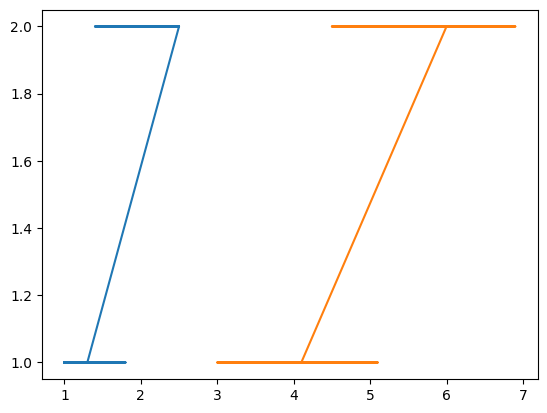

In [81]:
plt.plot(X, y)

##### Building and Scoring another model (degree=2)

In [68]:
poly = PolynomialFeatures(degree=1)
X_train_d2 = poly.fit_transform(X_train).reshape((-1,1))
X_test_d2 = poly.transform(X_test).reshape((-1,1))
model_d2 = LinearRegression()
model_d2.fit(X_train_d2, y_train)
y_pred = model_d2.predict(X_test)
r2_score(y_test, y_pred)

ValueError: Found input variables with inconsistent numbers of samples: [225, 75]